In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("../DATA/fake_reg.csv")

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [5]:
# We will try and predict the price


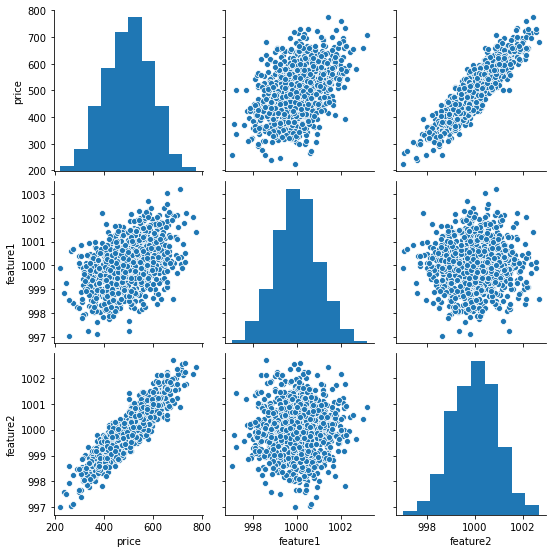

In [6]:
sns.pairplot(df)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# we can pass in only numpy array instead of pandas dfs
x = df.drop("price",axis=1).values
y = df["price"].values


In [10]:
x

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [11]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
x_train.shape

(700, 2)

In [19]:
y_train.shape

(700,)

In [20]:
x_test.shape

(300, 2)

In [21]:
from sklearn.preprocessing import MinMaxScaler


In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(x_train)

MinMaxScaler()

In [24]:
x_train = scaler.transform(x_train)

In [25]:
x_test = scaler.transform(x_test)
# Now it has been scaled to betwwen 0 and 1

In [27]:
# Max value now in x_train
x_train.max()

1.0

In [28]:
# min
x_train.min()

0.0

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
#help(Sequential)

In [101]:
model = Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

In [102]:
model.compile(optimizer="rmsprop",loss="mse")

In [103]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 255878.4898
Epoch 2/250
22/22 [==============================] - 0s 714us/step - loss: 260020.7609
Epoch 3/250
22/22 [==============================] - 0s 703us/step - loss: 254227.8696
Epoch 4/250
22/22 [==============================] - 0s 743us/step - loss: 258125.4069
Epoch 5/250
22/22 [==============================] - 0s 648us/step - loss: 255291.2948
Epoch 6/250
22/22 [==============================] - 0s 657us/step - loss: 254213.1318
Epoch 7/250
22/22 [==============================] - 0s 693us/step - loss: 256530.9511
Epoch 8/250
22/22 [==============================] - 0s 631us/step - loss: 250001.6012
Epoch 9/250
22/22 [==============================] - 0s 659us/step - loss: 254795.0550
Epoch 10/250
22/22 [==============================] - 0s 599us/step - loss: 256417.5924
Epoch 11/250
22/22 [==============================] - 0s 772us/step - loss: 253403.4137
Epoch 12/250
22/22 [=======================

In [104]:
lossdf = pd.DataFrame(model.history.history)

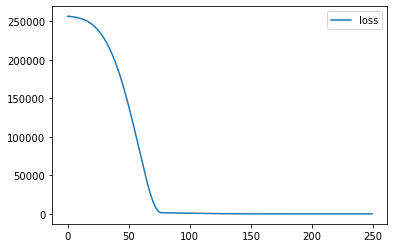

In [105]:
lossdf.plot()

In [106]:
# Balance of the model


In [107]:
# model evalution
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 669us/step - loss: 25.0959


25.09587860107422

In [108]:
y_pred = model.predict(x_test)

In [109]:
y_pred

array([[405.47614],
       [623.9199 ],
       [592.4862 ],
       [572.5562 ],
       [366.75967],
       [579.51886],
       [515.3279 ],
       [459.34546],
       [549.55505],
       [447.74805],
       [612.15594],
       [549.26874],
       [419.29797],
       [409.0573 ],
       [651.65625],
       [437.51675],
       [508.7379 ],
       [660.3368 ],
       [662.99536],
       [565.87   ],
       [334.34637],
       [445.055  ],
       [382.68933],
       [378.91833],
       [566.92444],
       [610.95654],
       [532.689  ],
       [428.06775],
       [655.84796],
       [414.27942],
       [442.85944],
       [485.3856 ],
       [438.6311 ],
       [682.27673],
       [424.96765],
       [417.88013],
       [502.2096 ],
       [550.7919 ],
       [510.0061 ],
       [395.52646],
       [618.9695 ],
       [416.82776],
       [604.81476],
       [446.1892 ],
       [502.26163],
       [582.06915],
       [669.4295 ],
       [490.66876],
       [318.69266],
       [485.68442],


In [110]:
# converting to a pandas serts
y_pred = pd.Series(y_pred.reshape(300,))

In [111]:
pred_df = pd.DataFrame(y_test,columns=["true value"])

In [112]:
pred_df["predicted"] = y_pred
pred_df

,true value,predicted
0,402.296319,405.476135
1,624.156198,623.919922
2,582.455066,592.486206
3,578.588606,572.556213
4,371.224104,366.759674
...,...,...
295,525.704657,529.337341
296,502.909473,515.601013
297,612.727910,610.020691
298,417.569725,417.156006


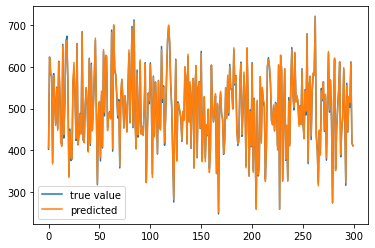

In [113]:
pred_df.plot()

In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [115]:
mean_absolute_error(pred_df["true value"],pred_df["predicted"])

4.016994277765353

In [116]:
mean_squared_error(pred_df["true value"],pred_df["predicted"])

25.0958739337102

In [117]:
mean_squared_error(pred_df["true value"],pred_df["predicted"])**0.5

5.009578219142825

In [118]:
# predicting on new unseen data
new_gem = [[998,1000]]

In [119]:
new_gem = scaler.transform(new_gem)

In [120]:
model.predict(new_gem)

array([[419.8775]], dtype=float32)

In [121]:
from tensorflow.keras.models import load_model

In [122]:
model.save("my_gem_model.h5")

In [123]:
# loading model
model1 = load_model("my_gem_model.h5")

In [124]:
model1.predict(new_gem)

array([[419.8775]], dtype=float32)